In [167]:
import pandas as pd
import numpy as np
from sklearn import metrics
import os
import glob
import seaborn as sns

In [168]:
data_good = pd.DataFrame(columns=['name', 'error_good'])
for csv in glob.glob(r'result_test\good\*.csv'):
    data_good = data_good.append(pd.read_csv(csv, names=['name', 'error_good'])) 

In [169]:
data_bad = pd.DataFrame(columns=['name', 'error_bad'])
for csv in glob.glob(r'result_test\bad\*.csv'):
    data_bad = data_bad.append(pd.read_csv(csv, names=['name', 'error_bad'])) 

In [170]:
data = pd.merge(data_good, data_bad, on='name')
data.head(5)

,name,error_good,error_bad
0,normal_id_00_00000000.wav,846.476096,498.702882
1,normal_id_00_00000001.wav,1101.708111,NaN
2,normal_id_00_00000002.wav,606.790945,432.656438
3,normal_id_00_00000003.wav,1424.738317,592.626835
4,normal_id_00_00000004.wav,1196.549121,789.238947


In [171]:
data['status'] = data['name'].str.split('_').apply(lambda x: x[0])
data['id'] = data['name'].str.split('_').apply(lambda x: x[2])
data.head(5)

,name,error_good,error_bad,status,id
0,normal_id_00_00000000.wav,846.476096,498.702882,normal,00
1,normal_id_00_00000001.wav,1101.708111,NaN,normal,00
2,normal_id_00_00000002.wav,606.790945,432.656438,normal,00
3,normal_id_00_00000003.wav,1424.738317,592.626835,normal,00
4,normal_id_00_00000004.wav,1196.549121,789.238947,normal,00


In [172]:
data_na = data
data_na['BpG']=data_na[['error_good','error_bad']].mean(axis=1)
print(data_na.head())

                        name   error_good   error_bad  status  id          BpG
0  normal_id_00_00000000.wav   846.476096  498.702882  normal  00   672.589489
1  normal_id_00_00000001.wav  1101.708111         NaN  normal  00  1101.708111
2  normal_id_00_00000002.wav   606.790945  432.656438  normal  00   519.723691
3  normal_id_00_00000003.wav  1424.738317  592.626835  normal  00  1008.682576
4  normal_id_00_00000004.wav  1196.549121  789.238947  normal  00   992.894034


d:\projects\dcase\venv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
d:\projects\dcase\venv\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


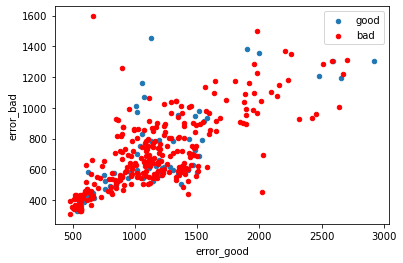

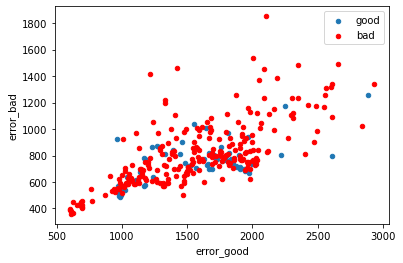

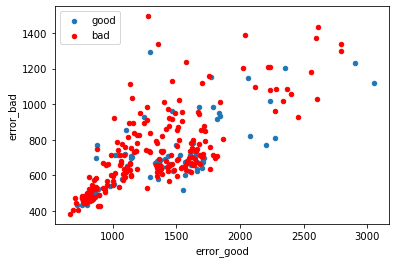

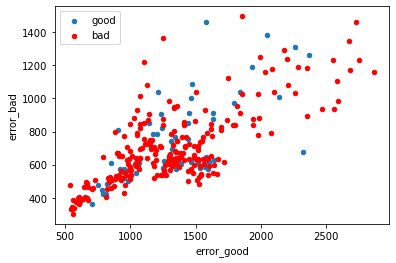

In [180]:
ids=['00','02','04','06']
normal_labels = np.zeros(len(data_na[(data_na['status'] == 'normal') & (data_na['id'] == id)]))
anomaly_labels = np.ones(len(data_na[(data_na['status'] == 'anomaly') & (data_na['id'] == id)]))
y_true = np.concatenate((normal_labels, anomaly_labels), axis=0)
for id in ids:
    dataplot=data_na[(data_na['id'] == id)][['status','error_good','error_bad']]
    dataplot.fillna(dataplot['error_good'].min())
    ax=dataplot[(data_na['status'] == 'normal')].plot( kind='scatter',x='error_good',y='error_bad', label="good")
    dataplot[(data_na['status'] == 'anomaly')].plot( color='red',kind='scatter',x='error_good',y='error_bad', label="bad",ax=ax);

In [174]:
y_pred = data_na[data_na['id'] == id]['BpG'].values
aucs=[]
for i in range(int(np.min(y_pred)),int(np.max(y_pred))):
    y_pred = data_na[data_na['id'] == id]['BpG'].values
    y_new=y_pred
    y_new[y_new<i]=0
    y_new[y_new>=i]=1
    auc = metrics.roc_auc_score(y_true, y_new)
    aucs.append(auc)
    print(i, auc)
print(np.max(aucs),metrics.roc_auc_score(y_true, data_na[data_na['id'] == id]['BpG'].values))

430 0.5
431 0.4986149584487535
432 0.4986149584487535
433 0.4986149584487535
434 0.4986149584487535
435 0.4986149584487535
436 0.4986149584487535
437 0.4986149584487535
438 0.49722991689750695
439 0.49722991689750695
440 0.49722991689750695
441 0.49722991689750695
442 0.49722991689750695
443 0.49584487534626037
444 0.49584487534626037
445 0.49584487534626037
446 0.49584487534626037
447 0.49584487534626037
448 0.49584487534626037
449 0.49584487534626037
450 0.49584487534626037
451 0.49445983379501385
452 0.4930747922437673
453 0.4930747922437673
454 0.4930747922437673
455 0.4930747922437673
456 0.4930747922437673
457 0.4930747922437673
458 0.4930747922437673
459 0.4930747922437673
460 0.4930747922437673
461 0.4930747922437673
462 0.4930747922437673
463 0.4930747922437673
464 0.4930747922437673
465 0.4930747922437673
466 0.4930747922437673
467 0.4930747922437673
468 0.4930747922437673
469 0.4930747922437673
470 0.4930747922437673
471 0.4930747922437673
472 0.4930747922437673
473 0.491689

In [175]:
auc

0.5013850415512465